# WEEK4 Conditional Mutual Information
## 1. Scissors rock paper analysis

In [1]:
#------------------------------------------------------------
# WHEN RUNNING LOCALLY UPDATE THIS CELL TO SET UP DATASET LOCATION
#------------------------------------------------------------
BASEURITXT='/home/jovyan/notebooks/CSYS5030/data/SPR'

In [2]:
from spr import loadGames, listPlayers, getPlayerAllMovesAndScores, getPlayerEntropyAndRatios
games = loadGames(BASEURITXT)


In [3]:
players = listPlayers(games)
print(players)
print(players[0])

moves, scores = getPlayerAllMovesAndScores('Isabelle', games)



['isabelle', 'clover', 'stuart', 'sebastian', 'yizhi', 'kc', 'm-sizzle']
isabelle


In [4]:
entropies, winRatios, lossRatios = getPlayerEntropyAndRatios(players, games)

isabelle plays with entropy 1.5488102670635504 and in average a score of -4
winRatio 0.29545454545454547, lossRatio 0.38636363636363635
clover plays with entropy 1.516147658077609 and in average a score of -3
winRatio 0.16, lossRatio 0.28
stuart plays with entropy 1.4839123015466111 and in average a score of -3
winRatio 0.2857142857142857, lossRatio 0.37142857142857144
sebastian plays with entropy 1.4396275363413569 and in average a score of 3
winRatio 0.28, lossRatio 0.16
yizhi plays with entropy 1.4987512731845576 and in average a score of 3
winRatio 0.38235294117647056, lossRatio 0.29411764705882354
kc plays with entropy 1.565596230357602 and in average a score of 3
winRatio 0.4, lossRatio 0.3
m-sizzle plays with entropy 1.5602518646164185 and in average a score of 1
winRatio 0.4, lossRatio 0.37777777777777777


# Stage 3 -- Conditional entropy calculations

In [6]:
import numpy as np
from week1 import conditionalEntropyEmpirical

def computeConditionalEntropyForPlayer(player:str, games: np.array):

    moves, scores = getPlayerAllMovesAndScores(player, games)
    moves_1 = [[move2, move1] for move1, move2 in zip(moves[slice(0, None, 1)], moves[slice(1, None, 1)]) ] 
    conditionalEntropy = conditionalEntropyEmpirical(moves_1)

    scores=np.array(scores)
    scores=scores[1:]  #since we're only calculating entropies from game 2 onwards (conditional on previous game), we cut out the first score
    winRatio=scores[scores==1].size/scores.size
    lossRatio=scores[scores==-1].size/scores.size

    return conditionalEntropy, winRatio, lossRatio


In [7]:
computeConditionalEntropyForPlayer('m-Sizzle', games)


(1.508585845307161, 0.4090909090909091, 0.36363636363636365)

In [8]:
#----------------------------------------------------
# Compute conditional entropy for all Players 
#----------------------------------------------------
players = listPlayers(games)

def computeConditionalEntropyForAllPlayers(players: list, games: np.array):
    
    # initialize lists

    scores=[]
    conditionalEntropies=[]
    lossRatios=[]
    winRatios=[]

    for player in players:
        conditionalEntropy, winRatio, lossRatio = computeConditionalEntropyForPlayer(player, games)
        
        winRatios.append(winRatio)
        lossRatios.append(lossRatio)
        conditionalEntropies.append(conditionalEntropy)

    return conditionalEntropies, winRatios, lossRatios




In [9]:
conditionalEntropies, winRatios, lossRatios = computeConditionalEntropyForAllPlayers(players, games)

In [10]:
pes = [[player, conditionalEntropy] for player, conditionalEntropy in zip(players, conditionalEntropies)]
print(pes)

[['isabelle', 1.1595026452514754], ['clover', 1.1211875323868168], ['stuart', 1.4248668227610133], ['sebastian', 1.125147399068765], ['yizhi', 1.1316714803387717], ['kc', 1.3420580875359998], ['m-sizzle', 1.508585845307161]]


In [11]:
# ----------------------------------------------------------------------
# Compute correlation between conditional entropies and win/loss ratios
# -----------------------------------------------------------------------

np.corrcoef(conditionalEntropies, winRatios)

array([[1.        , 0.56104977],
       [0.56104977, 1.        ]])

In [12]:
np.corrcoef(conditionalEntropies, lossRatios)

array([[1.        , 0.57766723],
       [0.57766723, 1.        ]])

### 5. Call the script to see the conditional entropies of each player, the plots and correlation analyses on how this related to performance.

 Who was most (conditionally) uncertain? 
 Did this correlate to wins? What about losses? Does this match your hypothesis?

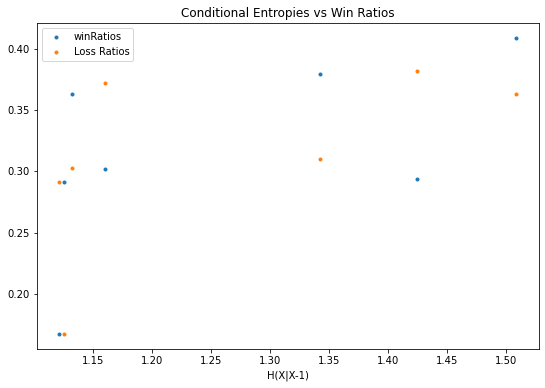

In [13]:
#------------------------------------------------------------
#   PLOT Conditional Entropies vs Ratios
#------------------------------------------------------------


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
axs.plot(conditionalEntropies, winRatios, '.', label='winRatios')
axs.plot(conditionalEntropies, lossRatios, '.', label='Loss Ratios')
axs.set_title('Conditional Entropies vs Win Ratios')
axs.set_xlabel('H(X|X-1)')
plt.legend()
plt.show()


# Stage 4 -- Mutual information calculations

In [ ]:

#-----------------------------------------------------------------------------
# Compute mutual information for a player , mutual information between their
# current move and their previous move and the previous one from the opponent
#-----------------------------------------------------------------------------

from spr import getPlayerAndOpponentAllMovesAndScores
from week1 import mutualInformationEmpiricalXnYn

def computeMutualInformationForPlayer(player: str, games):
    
    moves, scores, opponentMoves = getPlayerAndOpponentAllMovesAndScores(player, games)

    Xn = [move2 for move2 in moves[slice(1, None, 1)] ] 
    Yn = [[move1, opponentMove1] for move1, opponentMove1 in zip(moves[slice(0, None, 1)], opponentMoves[slice(0,None,1)]) ] 
    Yn = Yn[:-1]
    #conditionalEntropy = conditionalEntropyEmpirical(moves_1)

    MI = mutualInformationEmpiricalXnYn(Xn,Yn)
    scores=np.array(scores)
    scores=scores[1:]  #since we're only calculating entropies from game 2 onwards (conditional on previous game), we cut out the first score
    winRatio=scores[scores==1].size/scores.size
    lossRatio=scores[scores==-1].size/scores.size

    return MI, winRatio, lossRatio

In [ ]:
computeMutualInformationForPlayer('isabelle', games)

In [ ]:
from week1 import jointEntropyEmpiricalOld, jointEntropyEmpirical

jointEntropyEmpirical([[0,0],[0,1],[1,0],[1,1]])

In [ ]:
from week1 import mutualInformationEmpiricalOld, mutualInformationEmpirical

#     mutualinformationempirical([0,0,1,1],[0,1,0,1]) and validating that you get the result 0 bits
# mutualinformationempirical([0,0,1,1],[0,0,1,1]) and validating that you get the result 1 bit
print(mutualInformationEmpirical([[0,0],[0,1],[1,0],[1,1]]))
print(mutualInformationEmpirical([[0,0],[0,0],[1,1],[1,1]]))

# 4. Coding conditional mutual information

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
#
# The conditional mutual information between variables x and y, conditional on variable z, for a distribution p(x,y,z) is:
# 
# I(X;Y∣Z)=H(X∣Z)+H(Y∣Z)−H(X,Y∣Z)
#------------------------------------------------------------------------------------------------------------------------------


'''
Test that your code works by running, e.g.:
conditionalmutualinformationempirical([0,0,1,1],[0,1,0,1],[0,1,0,1]) and validating that you get the result 0 bits.
conditionalmutualinformationempirical([0,0,1,1],[0,0,1,1],[0,1,1,0]) and validating that you get the result 1 bit.
conditionalmutualinformationempirical([0,0,1,1],[0,1,0,1],[0,1,1,0]) and validating that you get the result 1 bit. 
'''
 
from week1 import conditionalEntropyEmpirical, conditionalEntropyEmpiricalXnYn

def conditionalMutualInformationEmpirical(xn: np.array, yn: np.array, zn: np.array):
    
    HXgZ = conditionalEntropyEmpirical([[x, z] for x,z in zip(xn, zn)])
    HYgZ = conditionalEntropyEmpirical([[y, z] for y,z in zip(yn, zn)])
    xnyn = np.column_stack((xn,yn))
    HXYgZ = conditionalEntropyEmpiricalXnYn(xnyn, zn)
    CMI = HXgZ + HYgZ - HXYgZ
    return CMI


In [ ]:
conditionalMutualInformationEmpirical([0,0,1,1],[0,1,0,1],[0,1,0,1])

In [ ]:
conditionalMutualInformationEmpirical([0,0,1,1],[0,0,1,1],[0,1,1,0])

Here Z is not correlated to X and Y, so it doesn't change the information between X and Y to condition on Z

In [ ]:
mutualInformationEmpiricalXnYn([0,0,1,1],[0,0,1,1])

In [ ]:
# Last Case Z is X xor Y
conditionalMutualInformationEmpirical([0,0,1,1],[0,1,0,1],[0,1,1,0])

In [ ]:
# no relationship between x and Y, y and z, or x and z
mutualInformationEmpiricalXnYn([0,0,1,1],[0,1,0,1])

In [ ]:
# if we have 2 of them we can completely decode the last one ==> we have 1 bit of information
# classic example of synergy A
mutualInformationEmpiricalXnYn([0,0,1,1],np.column_stack(([0,1,0,1],[0,1,1,0])))

### Challenge: 
 
Let's make a larger empirical test of case c above. First we will generate a large sample of binary values for variable X, X = randi(2, 1000, 1) - 1;, and same for Z, Z = randi(2, 1000, 1) - 1;, then we will construct the samples of y as the exclusive OR (XOR) of these two, Y = xor(X, Z);. Validate using mutualinformationempirical that there is (almost) no mutual information between either X or Z with Y, yet using conditionalmutualinformationempirical that there is (almost) one bit of conditional mutual information from X to Y given Z (or vice versa in X and Z). Explain the meaning of the conditioning on Z increasing the apparent mutual information between X and Y - see part 5 of the lecture, below. (Also: why are the bit values not quite 0 and 1 in this example?)

In [ ]:
X = np.random.randint(2, size=1000)
Z = np.random.randint(2, size=1000)
Y = np.logical_xor(X, Z)

In [ ]:
from week1 import mutualInformationEmpirical

MI_XY = mutualInformationEmpirical(np.column_stack((X,Y)))
MI_ZY = mutualInformationEmpirical(np.column_stack((Z,Y)))
MI_XZ = mutualInformationEmpirical(np.column_stack((X,Z)))

In [ ]:
print(MI_XY)
print(MI_ZY)
print(MI_XZ)

## 4.3 Compute conditional mutual Information based on a joint probability matrix

In [ ]:
'''
% Computes the mutual information over all outcomes x of a random
%  variable X with outcomes y of a random variable Y, conditioning on 
%  outcomes z of a random variable Z.
%  Probability matrix p(x,y,z) is given for each candidate outcome
%  (x,y,z).
%
% Inputs:
% - p - 3D probability distribution function over all outcomes (x,y,z).
%       p is a matrix over all combinations of x and y and z,
%	where p(1,3,2) gives the probability of the first symbol of variable
%	x co-occuring with the third symbol of variable y and the second
%	symbol of z.
%       The sum over p must be 1.
%       E.g.:
%         p(:,:,1) = [0.114286, 0.171429; 0.057143, 0.228571];
%         p(:,:,2) = [0.171429, 0.114286; 0.028571, 0.114286];
%
% Outputs:
% - result - mutual information of X with Y

% We need to compute H(X|Z) + H(Y|Z) - H(X,Y|Z).
% But our conditional entropy calculator won't do H(X,Y|Z) since it doesn't accept a joint probability for X,Y.
% So, easier to rewrite as:
%  H(X,Z) - H(Z) + H(Y,Z) - H(Z) - H(X,Y,Z) + H(Z)
%  = H(X,Z) - H(Z) + H(Y,Z) - H(X,Y,Z)
'''

def conditionalMutualInformation(p):
    
    pass

In [ ]:
import numpy as np
-np.log2(1/12)